In [3]:
from keras.datasets import imdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
(train_data ,train_labels),(test_data,test_labels) =imdb.load_data(num_words=10000)

In [5]:
# extracting the data from the dataset

word_index=imdb.get_word_index()
reverse_word_index =dict([(value , key) for (key,value) in word_index.items()]) ## created a dictionary over 
#print(reverse_word_index)
decoded_review =''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [6]:

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
# Build the network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
# Compile the network
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Validation Set

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
# Train the model
history = model.fit(partial_x_train, partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 44ms/step - loss: 0.5104 - accuracy: 0.7815 - val_loss: 0.4203 - val_accuracy: 0.8161
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2971 - accuracy: 0.9031 - val_loss: 0.3089 - val_accuracy: 0.8836
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2185 - accuracy: 0.9292 - val_loss: 0.2864 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1726 - accuracy: 0.9439 - val_loss: 0.3094 - val_accuracy: 0.8779
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1417 - accuracy: 0.9541 - val_loss: 0.2854 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1151 - accuracy: 0.9641 - val_loss: 0.2972 - val_accuracy: 0.8892
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0946 - accuracy: 0.9714 - val_loss: 0.3314 - val_accuracy: 0.8761
Epoch 8/20
30

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss

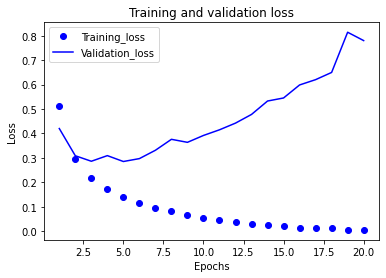

In [12]:
acc =history_dict['val_accuracy']
loss_values =history_dict['loss']
val_loss_values =history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,loss_values,'bo',label='Training_loss')
plt.plot(epochs,val_loss_values,'b',label='Validation_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting the training and validation accuracy

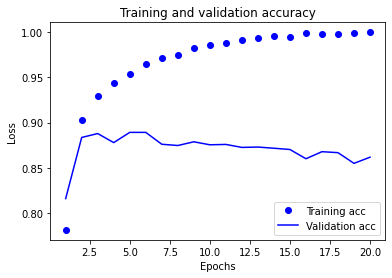

In [13]:
plt.clf()
acc_values =history_dict['accuracy']
val_acc_values =history_dict['val_accuracy']

plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Retraining a model from scratch

In [14]:
model =models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [15]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(x_train,y_train,epochs=4,batch_size=512)
results =model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 1s 27ms/step - loss: 0.4643 - accuracy: 0.8241
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2694 - accuracy: 0.9068
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2063 - accuracy: 0.9267
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3039 - accuracy: 0.8801


In [17]:
results

[0.3038578927516937, 0.880079984664917]

Further Experiments-1)


In [18]:
model =models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [19]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train,epochs=4,batch_size=512)
results =model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 1s 27ms/step - loss: 0.4618 - accuracy: 0.8160
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2531 - accuracy: 0.9093
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1937 - accuracy: 0.9298
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3008 - accuracy: 0.8826


Nothing much changes after adding a dense layer

In [21]:
model =models.Sequential()
model.add(layers.Dense(16,activation='tanh',input_shape=(10000,)))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [22]:
model.fit(x_train,y_train,epochs=4,batch_size=512)
results =model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1324 - accuracy: 0.8278
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0684 - accuracy: 0.9133
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.0504 - accuracy: 0.9360
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0940 - accuracy: 0.8763
